# 识别自己的手写数字（图像预测）

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### 1、载入数据

In [4]:
# 1、载入数据
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2、载入训练好的模型

In [5]:
# 2、载入训练好的模型
model = load_model('mnist.h5')

### 3、载入自己写的数字图片并设置大小

In [8]:
# 3、载入自己写的数字图片并设置大小
img = Image.open('9.png')
# 设置大小（和数据集的图片一致）
img = img.resize((28, 28))

### 4、转灰度图

In [9]:
# 4、转灰度图
gray = np.array(img.convert('L'))#.convert('L')：转灰度图

### 5、转黑底白字、数据归一化

In [10]:
# 5、转黑底白字、数据归一化
gray_inv = (255-gray)/255.0

### 6、转四维数据

In [11]:
# 6、转四维数据（CNN预测需要）
image = gray_inv.reshape((1,28,28,1))

### 7、预测

In [12]:
# 7、预测
prediction = model.predict(image)           # 预测
prediction = np.argmax(prediction,axis=1)   # 找出最大值
print('预测结果：', prediction)

预测结果： [8]


### 8、显示图像

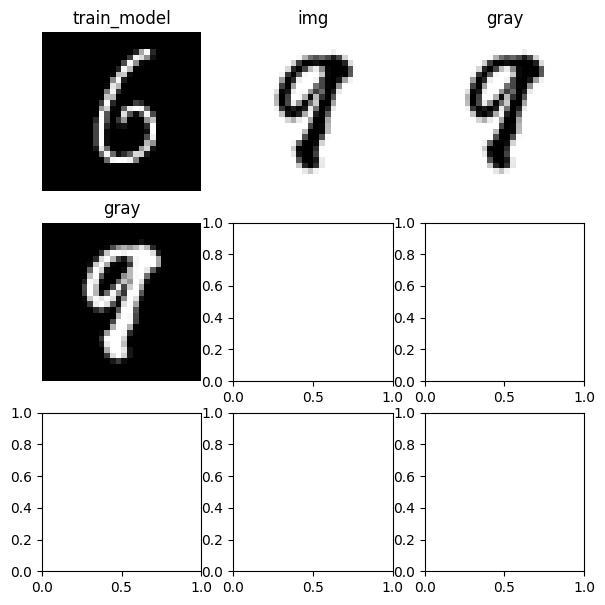

In [14]:
# 8、显示
# 设置plt图表
f, ax = plt.subplots(3, 3, figsize=(7, 7))
# 显示数据集图像
ax[0][0].set_title('train_model')
ax[0][0].axis('off')
ax[0][0].imshow(x_train[18], 'gray')
# 显示原图
ax[0][1].set_title('img')
ax[0][1].axis('off')
ax[0][1].imshow(img, 'gray')
# 显示灰度图（白底黑字）
ax[0][2].set_title('gray')
ax[0][2].axis('off')
ax[0][2].imshow(gray, 'gray')
# 显示灰度图（黑底白字）
ax[1][0].set_title('gray')
ax[1][0].axis('off')
ax[1][0].imshow(gray_inv, 'gray')

plt.show()